# Predicting Early Stage Diabetes Risk In Individuals using Machine Learning

## Datasource
+ https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset
+ https://archive.ics.uci.edu/ml/machine-learning-databases/00529/


## Project Outline
+ Problem
+ Motivation
+ Dataset Information
+ Feature Processing and Feature Engineering
+ Machiine Learning Model Development
+ Prediction/Result
+ Evaluating the result/metrics
+ Conclusion
+ References

## Problem Statement
+ Diabetes is a very common disease with many risk factors that can lead to getting diabetes.
+ Is it possible to predict whether a patient/individual is at a risk of early stage diabetes given the signs and symptoms.
+ Since we are using an already labelled dataset to build a predictive model our task will be a supervised machine learning problem
+ Therefore we will be using a supervised machine learning classification approach to solve our problem.
+ Based on the number of target class we have will will need to build a binary classifier type of ML model.


## About Dataset
+ Datasource:
    - https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#
+ Description:
    - The dataset was collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.
    
+ Metadata:
    - The dataset is a multivariate dataset in a CSV format.
    - It has 520 datapoints and 17 fields or attributes.
    
+ Attribute Information:
    - Age 1.20-65
    - Sex 1. Male, 2.Female
    - Polyuria 1.Yes, 2.No.
    - Polydipsia 1.Yes, 2.No.
    - sudden weight loss 1.Yes, 2.No.
    - weakness 1.Yes, 2.No.
    - Polyphagia 1.Yes, 2.No.
    - Genital thrush 1.Yes, 2.No.
    - visual blurring 1.Yes, 2.No.
    - Itching 1.Yes, 2.No.
    - Irritability 1.Yes, 2.No.
    - delayed healing 1.Yes, 2.No.
    - partial paresis 1.Yes, 2.No.
    - muscle sti
ness 1.Yes, 2.No.
    - Alopecia 1.Yes, 2.No.
    - Obesity 1.Yes, 2.No.
    - Class 1.Positive, 2.Negative.

## Importing the Packages

Loading the EDA Packages

In [1]:
import pandas as pd
import numpy as np

Loading the Visulization Packages

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the Machine Learning Packages

In [74]:
import sklearn

# Splitting data into Train and Test Data
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [4]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")


Dependency versions

In [5]:
print("Pandas", pd.__version__)
print("Numpy",np.__version__)
print("Matplotlib",matplotlib.__version__)
print("Seabron",sns.__version__)
print("Sklearn",sklearn.__version__)

Pandas 1.2.4
Numpy 1.20.3
Matplotlib 3.4.2
Seabron 0.11.1
Sklearn 0.24.2


## Getting the Dataset

In [6]:
data = pd.read_csv("data/diabetes_data_upload.csv")

## Descriptive Analysis of Dataset

In [7]:
# Read in Dataset
df = pd.read_csv("data/diabetes_data_upload.csv")

In [8]:
# Preview the First Rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [9]:
# Check for the shape of the dataset
df.shape

(520, 17)

In [10]:
# Check for columns names
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [11]:
# Check Datatypes
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [12]:
# Check how many missing values we have
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

#### Narrative
+ There are no missing values and we have 520 datapoints and 17 Columns
+ Most of the columns/fields are of the Object type we will need to convert them to a proper format

#### Data Cleaning
+ Convert the column names to a better case and format
+ Encode the dataset into numeric format using either LabelEncoder or Custom Function
    - Gender : Female(0),Male(1)
    - all : No(0),Yes(1)

In [13]:
data.columns = data.columns.str.lower()
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [14]:
data.columns = data.columns.str.replace(' ','_')
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

Encoding the dataset

In [15]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [16]:
objList = data.select_dtypes(include='object').columns
objList

Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [17]:
encoding_columns = [ 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']

In [18]:
# Encode Every column except age,gender and class
for col in encoding_columns:
    data[col] = encoder.fit_transform(data[col])

In [19]:
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [20]:
data.dtypes

age                    int64
gender                object
polyuria               int32
polydipsia             int32
sudden_weight_loss     int32
weakness               int32
polyphagia             int32
genital_thrush         int32
visual_blurring        int32
itching                int32
irritability           int32
delayed_healing        int32
partial_paresis        int32
muscle_stiffness       int32
alopecia               int32
obesity                int32
class                 object
dtype: object

In [21]:
# Encoding Class and Gender
data['gender'] = pd.get_dummies(data['gender'],drop_first=True)
data['class'] = pd.get_dummies(data['class'], drop_first=True)

+ Here, Representation of Male is 1 and Female is 0. Similarily, 'Positive' values in the target class are 1 and 'Negative' 0

In [22]:
data.dtypes

age                   int64
gender                uint8
polyuria              int32
polydipsia            int32
sudden_weight_loss    int32
weakness              int32
polyphagia            int32
genital_thrush        int32
visual_blurring       int32
itching               int32
irritability          int32
delayed_healing       int32
partial_paresis       int32
muscle_stiffness      int32
alopecia              int32
obesity               int32
class                 uint8
dtype: object

In [23]:
# Checking whether dataset is balanced or unbalanced

data['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

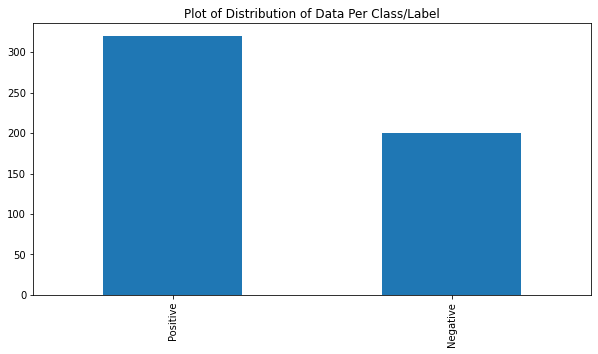

In [24]:
# Plot of Distribution of Data Per Class/Label
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Class/Label")
df['class'].value_counts().plot(kind='bar')
plt.show()

#### Narrative
+ Our dataset has 
    - 320 datapoints for Positive class
    - 200 datapoints for Negative class
+ This looks like a balanced dataset from the plot of the value counts

In [25]:
# Value Count of Gender
data['gender'].value_counts()

1    328
0    192
Name: gender, dtype: int64

<AxesSubplot:title={'center':'Plot of Distribution of Data per Gender'}>

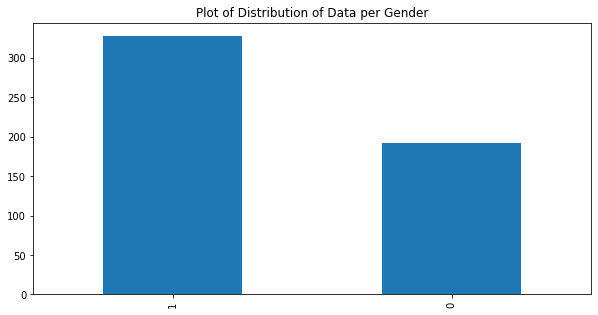

In [26]:
# Plot of Distribution of Data Per Gender
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data per Gender")
data['gender'].value_counts().plot(kind='bar')

#### Narrative
+ Our dataset has 
    - 328 datapoints for class 1(Males)
    - 192 datapoints for class 0(Females)
+ There are more males than females

### Frequency Distribution Table using the Age Range¶

In [27]:
# Finding the minimum and max age
print("Max",data['age'].max())
print("Min",data['age'].min())

Max 90
Min 16


In [28]:
# Creating Age Bins
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80 and more"]
bins= [0,10,20,30,40,50,60,70,80,90]
age_bins = pd.cut(data['age'],bins=bins,labels=labels)
age_bins

0      30-40
1      50-60
2      40-50
3      40-50
4      50-60
       ...  
515    30-40
516    40-50
517    50-60
518    30-40
519    40-50
Name: age, Length: 520, dtype: category
Categories (9, object): ['Less than 10' < '10-20' < '20-30' < '30-40' ... '50-60' < '60-70' < '70-80' < '80 and more']

In [29]:
freq_df = data.groupby(age_bins).size()
freq_df

age
Less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
50-60           127
60-70            66
70-80            10
80 and more       4
dtype: int64

In [30]:
freq_df = freq_df.reset_index(name='count')

In [31]:
freq_df.head()

,age,count
0,Less than 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


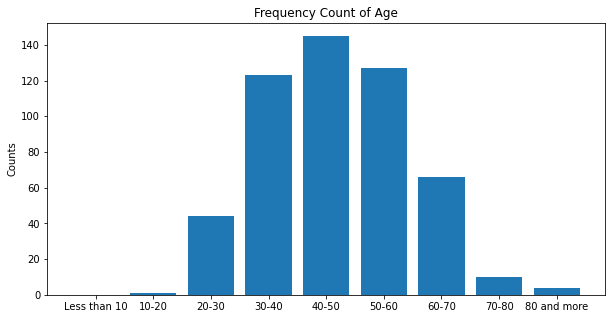

In [32]:
# Plot of Distribution of Data Per Gender
plt.figure(figsize=(10,5))
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

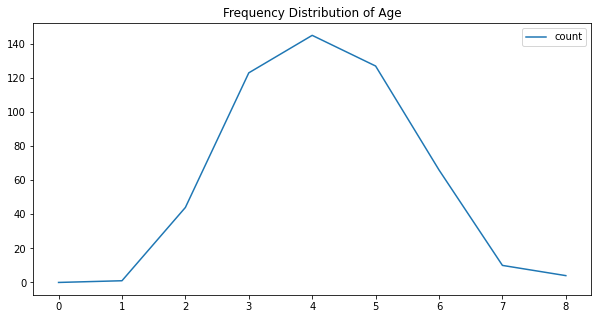

In [33]:
# Plot of Distribution of Data Per Gender
freq_df.plot(kind='line',figsize=(10,5))
plt.title("Frequency Distribution of Age")
plt.show()

<AxesSubplot:xlabel='age'>

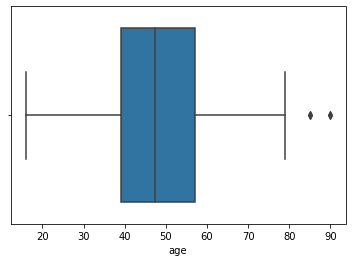

In [34]:
# Find Outliers in Age using BoxPlot
sns.boxplot(data['age'])

#### Correlation Analysis of Features in Relation to Target Class ( Early Stage Risk)
+ We will noew explore the dataset to see if there is an association between the features and the target label class

In [35]:
# Correlation matrix
data.corr()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


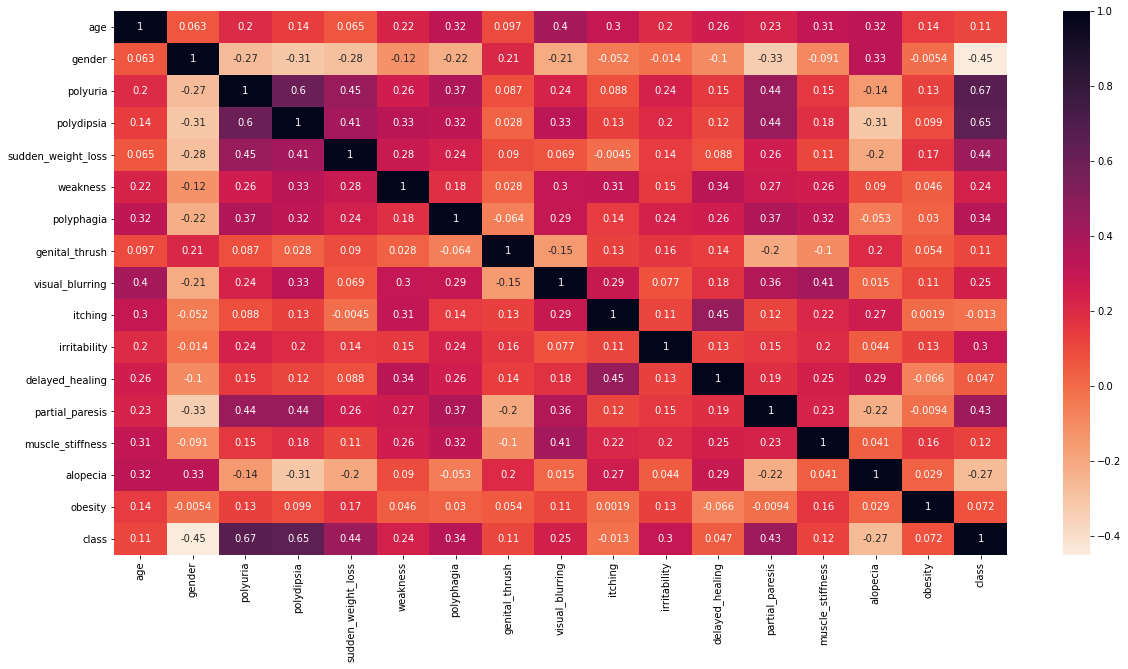

In [36]:
# Plotting Correlation with Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='rocket_r')
plt.show()

In [37]:
corr_matrix = data.corr()

In [38]:
s = corr_matrix.abs().stack()

top_features_per_correlation = s.sort_values(kind="quicksort")
top_features_per_correlation

obesity             itching               0.001894
itching             obesity               0.001894
                    sudden_weight_loss    0.004516
sudden_weight_loss  itching               0.004516
obesity             gender                0.005396
                                            ...   
polydipsia          polydipsia            1.000000
polyuria            polyuria              1.000000
gender              gender                1.000000
obesity             obesity               1.000000
class               class                 1.000000
Length: 289, dtype: float64

## Feature Selection

In [39]:
from sklearn.feature_selection import SelectKBest,chi2,RFE 


In [44]:
# Features and Labels

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [46]:
# Finding the best features using SelectKbest

skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(X, y)

In [47]:
best_feature_fit

SelectKBest(score_func=<function chi2 at 0x0000024671D11430>)

In [48]:
feature_score = pd.DataFrame(best_feature_fit.scores_, columns= ['Feature Score'], index= X.columns)

In [52]:
feature_score.sort_values(by='Feature Score', ascending=False)

,Feature Score
polydipsia,120.785515
polyuria,116.184593
sudden_weight_loss,57.749309
partial_paresis,55.314286
gender,38.747637
irritability,35.334127
polyphagia,33.198418
alopecia,24.402793
age,18.845767
visual_blurring,18.124571


In [54]:
feature_score.nlargest(12,'Feature Score')

,Feature Score
polydipsia,120.785515
polyuria,116.184593
sudden_weight_loss,57.749309
partial_paresis,55.314286
gender,38.747637
irritability,35.334127
polyphagia,33.198418
alopecia,24.402793
age,18.845767
visual_blurring,18.124571


<AxesSubplot:>

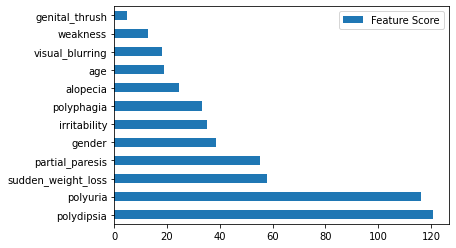

In [56]:
feature_score.nlargest(12,'Feature Score').plot(kind='barh')

### Narrative
+ From our analysis,polydipsia,polyuria,sudden weight loss and partial paresis plays an important role in making our prediction
+ This confirms an already established fact for signs of diabetes ie, polydipsia,polyuria and polyphagia.


## ML Model Development
* We will be modelling the data using two classification algorithms
    - Logistic Regression
    - Decision Tree Classifier

In [58]:
# Features and Labels
print('Feature: ',X)
print('Label: ',y)

Feature:       age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0             0               0                0  

Splitting the dataset into Training and Test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

In [60]:
# Shape of Dataset
print("original data",df.shape)
print("training data",X_train.shape)
print("testing data",X_test.shape)

original data (520, 17)
training data (416, 16)
testing data (104, 16)


Logistic Regression

In [61]:
log_model = LogisticRegression()

In [62]:
# Fitting the model
log_model.fit(X_train, y_train)

LogisticRegression()

In [63]:
prediction = log_model.predict(X_test)
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=uint8)

In [68]:
# Model Accuracy 
print("Accuracy of Log_Model: {}".format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

Accuracy of Log_Model: 0.9230769230769231
[[41  2]
 [ 6 55]]


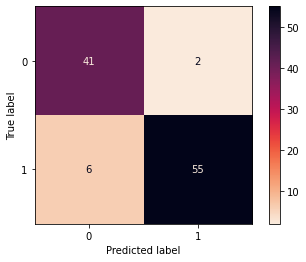

In [73]:
# Plotting Confusion Matrix
plot_confusion_matrix(log_model,X_test, y_test, cmap = 'rocket_r')

In [67]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.96      0.90      0.93        61

    accuracy                           0.92       104
   macro avg       0.92      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



Text(0.5, 1.0, 'Plot of ROC Curve for LR Model')

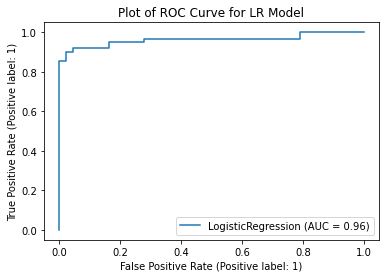

In [77]:
# ROC Curve
plot_roc_curve(log_model, X_test, y_test)
plt.title("Plot of ROC Curve for LR Model")

#### Narrative
+ Using the LogisticRegression ML Estimator our model had an accuracy score of 0.923 (92%)

Decision Tree Classifier

In [78]:
dt_model = DecisionTreeClassifier()

In [79]:
# Fitting the Model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred = dt_model.predict(X_test)

In [81]:
# Model Accuracy
print('Accuracy of Decision Tress Classifier: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of Decision Tress Classifier: 0.9615384615384616


In [82]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[41,  2],
       [ 2, 59]], dtype=int64)

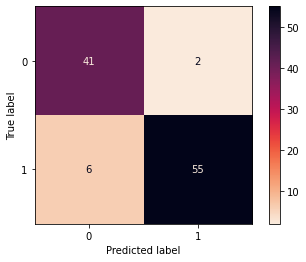

In [83]:
# Plotting Confusion Matrix
plot_confusion_matrix(log_model,X_test, y_test, cmap = 'rocket_r')

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        61

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



Text(0.5, 1.0, 'Plot of ROC Curve for Decision Tree Model')

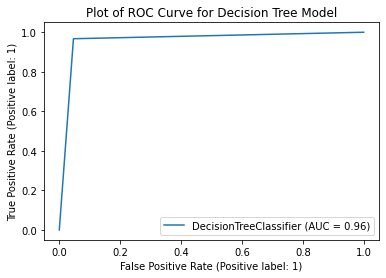

In [87]:
# ROC Curve
plot_roc_curve(dt_model, X_test, y_test)
plt.title("Plot of ROC Curve for Decision Tree Model")

#### Narrative
+ Using the Decision Tree ML Estimator our model had an accuracy score of 0.961 (96%)

## Using F1 Score to compare both models

In [88]:
from sklearn.metrics import f1_score

f1_for_lr_model = f1_score(y_test, prediction, average='macro')
f1_for_dt_model = f1_score(y_test, y_pred, average='macro')

In [89]:
print("LR F1-Sccore: ",f1_for_lr_model)
print("DT F!-Score: ", f1_for_dt_model)

LR F1-Sccore:  0.9216572504708098
DT F!-Score:  0.9603507434235607


#### Narrative
+ The Decision Tree Classifier does better than the Logistic Regression Classifier

## Saving the Model

In [90]:
# Using Joblib
import joblib

In [91]:
# Saving LR Model
lr_model_file = open("logistic_regression_model_diabetes.pkl","wb")
joblib.dump(log_model, lr_model_file)
lr_model_file.close()

In [92]:
# Saving Decision Tree Model
dt_model_file = open("decision_tree_model_diabetes.pkl","wb")
joblib.dump(dt_model,dt_model_file)
dt_model_file.close()